In [2]:
print (
    "Hello World")


Hello World


In [2]:
import pandas as pd

# Caricamento del dataset
file_path = "C:/Users/marti/Downloads/owid-covid-data.csv"
df = pd.read_csv(file_path)

# Verifica dimensioni del dataset
print("Dimensioni del dataset:")
print(f"Numero di righe: {df.shape[0]}")
print(f"Numero di colonne: {df.shape[1]}")

# Visualizzazione dei metadati (nomi delle colonne e tipi di dati)
print("\nMetadati del dataset:")
df.info()

# Anteprima dei primi 5 record
print("\nPrime 5 righe del dataset:")
print(df.head())


Dimensioni del dataset:
Numero di righe: 429435
Numero di colonne: 67

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
file_path = r"C:\\Users\\marti\\Downloads\\owid-covid-data.csv"
df = pd.read_csv(file_path)

# Assicurarsi che le date siano nel formato datetime
df['date'] = pd.to_datetime(df['date'])

# Punto 2: Dati per ogni continente
# a) Numero di casi totali per continente
max_nazione_per_continente = df.groupby(["continent", "location"])["total_cases"].max().dropna()
# Visualizzare i risultati
print("Massimo di total_cases per nazione all'interno di ogni continente:")
print(max_nazione_per_continente)

# Somma i valori massimi di total_cases per ogni continente
somma_max_continente = max_nazione_per_continente.groupby("continent").sum()
print(somma_max_continente)

# b) Percentuale rispetto al totale mondiale
totale_casi_globali = max_nazione_per_continente.sum()
print(totale_casi_globali)
percentuale_per_continente=(somma_max_continente / totale_casi_globali) * 100
print(percentuale_per_continente)



Massimo di total_cases per nazione all'interno di ogni continente:
continent      location    
Africa         Algeria          272139.0
               Angola           107481.0
               Benin             28036.0
               Botswana         330696.0
               Burkina Faso      22139.0
                                 ...    
South America  Paraguay         735759.0
               Peru            4526977.0
               Suriname          82501.0
               Uruguay         1041346.0
               Venezuela        552695.0
Name: total_cases, Length: 234, dtype: float64
continent
Africa            13145540.0
Asia             301532347.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64
775900191.0
continent
Africa            1.694231
Asia             38.862260
Europe           32.596572
North America    16.044933
Oceania           1.933670
South America     8.868334
Name:

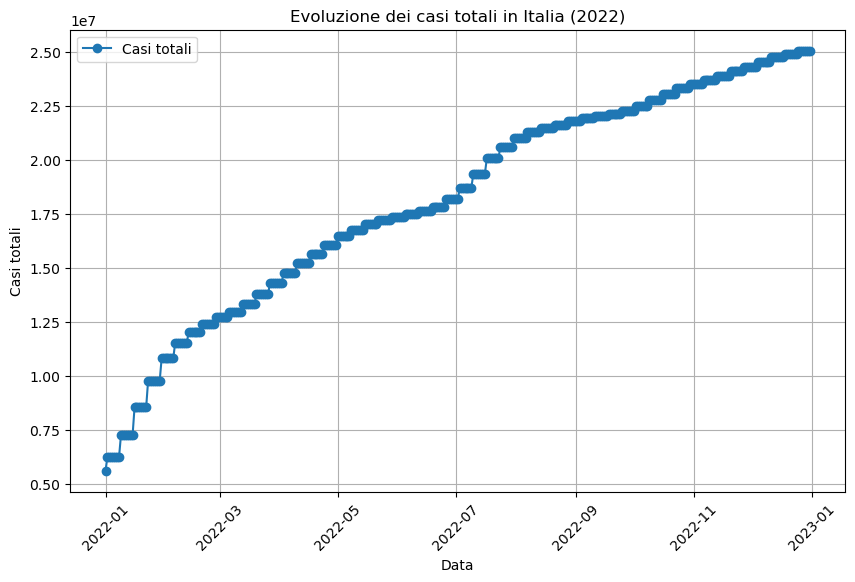

In [18]:
italy_data_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# a) Evoluzione dei casi totali
evolution_cases = italy_data_2022[['date', 'total_cases']]
plt.figure(figsize=(10, 6))
plt.plot(evolution_cases['date'], evolution_cases['total_cases'], marker='o', label='Casi totali')
plt.title('Evoluzione dei casi totali in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

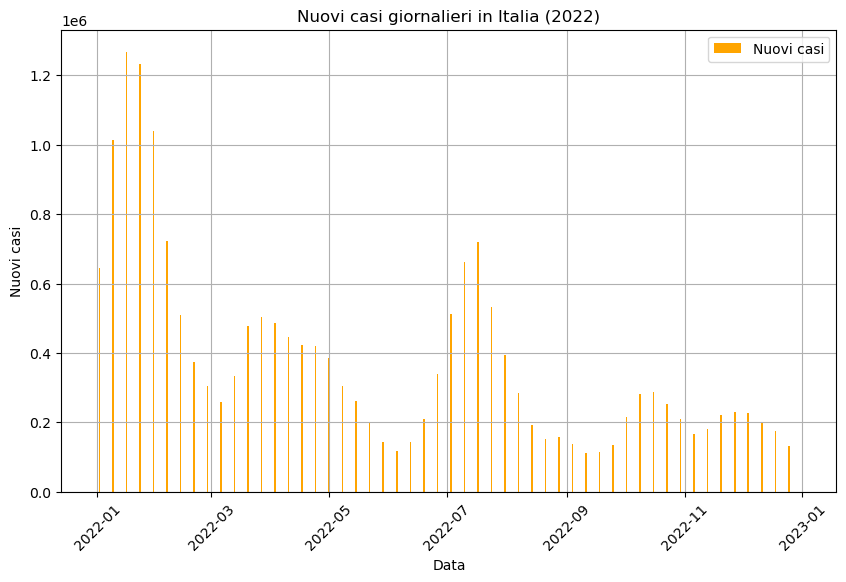

In [20]:
# b) Numero di nuovi casi rispetto alla data
new_cases = italy_data_2022[['date', 'new_cases']]
plt.figure(figsize=(10, 6))
plt.bar(new_cases['date'], new_cases['new_cases'], color='orange', label='Nuovi casi')
plt.title('Nuovi casi giornalieri in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

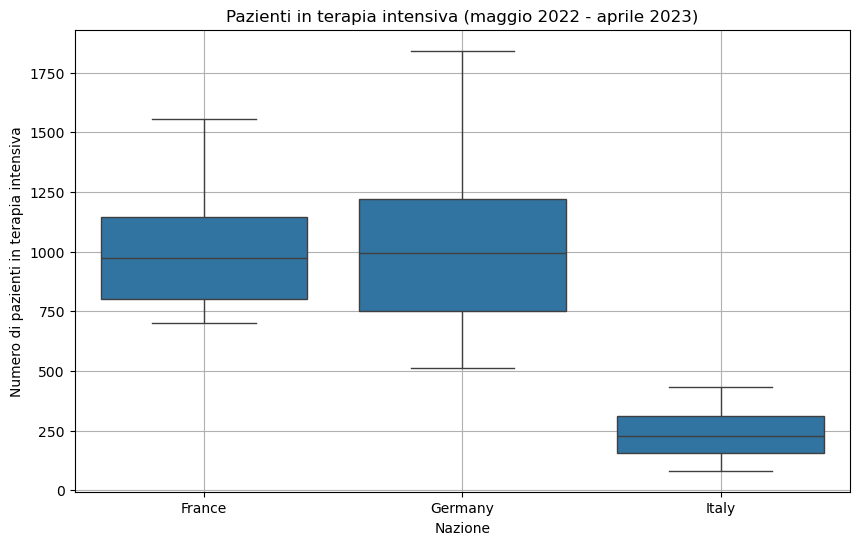


Riepilogo pazienti in terapia intensiva:
          count         mean         std    min    25%    50%     75%     max
location                                                                     
France    335.0   998.379104  220.152715  699.0  803.0  972.0  1145.5  1557.0
Germany   365.0  1022.386301  306.113714  512.0  753.0  994.0  1221.0  1842.0
Italy     365.0   231.254795   91.607400   82.0  157.0  227.0   310.0   434.0


In [22]:
# Punto 4: Boxplot per pazienti in terapia intensiva (maggio 2022 - aprile 2023)
# Filtrare i dati
icu_countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'
filtered_data = df[(df['location'].isin(icu_countries)) &
                   (df['date'] >= start_date) & (df['date'] <= end_date)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='location', y='icu_patients')
plt.title('Pazienti in terapia intensiva (maggio 2022 - aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva')
plt.grid()
plt.show()

# Commento sui risultati
tot_icu_summary = filtered_data.groupby('location')['icu_patients'].describe()
print("\nRiepilogo pazienti in terapia intensiva:")
print(tot_icu_summary)

In [30]:
# Punto 5: Pazienti ospedalizzati nel 2023
# Assicurarsi che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrare i dati per le nazioni e per l'anno 2023
nazioni_punto5 = ["Italy", "France", "Germany", "Spain"]
dati_filtrati5 = df[(df["location"].isin(nazioni_punto5)) & 
                   (df["date"] >= "2023-01-01") & 
                   (df["date"] <= "2023-12-31")]

# a) Somma delle ammissioni ospedaliere settimanali per ogni nazione
totale_ospedalizzati = dati_filtrati5.groupby("location")["weekly_hosp_admissions"].sum()

# Converto i totali in interi (dove necessario)
totale_ospedalizzati = totale_ospedalizzati.astype(int)

# Stampo i risultati
print("\nSomma delle ammissioni ospedaliere settimanali nel 2023 per ciascuna nazione:")
print(totale_ospedalizzati)

# b) Gestione dei dati nulli
missing_hospital_data = dati_filtrati5['weekly_hosp_admissions'].isna().sum()
print("\nDati mancanti per 'weekly_hosp_admissions':", missing_hospital_data)

if missing_hospital_data > 0:
    print("Ci sono dati mancanti. Valutare la possibilità di sostituirli con interpolazioni o di ignorarli a seconda del contesto.")



Somma delle ammissioni ospedaliere settimanali nel 2023 per ciascuna nazione:
location
France     268117
Germany    897776
Italy      592019
Spain      299463
Name: weekly_hosp_admissions, dtype: int32

Dati mancanti per 'weekly_hosp_admissions': 665
Ci sono dati mancanti. Valutare la possibilità di sostituirli con interpolazioni o di ignorarli a seconda del contesto.
